### summary
We use ribosome profiling to demonstrate the selectivity of a small molecule, PF-06446846 that inhibits translation of its target by selectively inducing ribosome-stalling in a nascent chain sequence dependent manner.

### overall design
Study 1: Huh7 cells were treated with 1.5 µM PF-06446846, 0.3 µM PF-06446846 or vehicle for 10 or 60 minutes, and subjected to ribosome profiling. This study included three biological replicates
Study 2: Huh7 cells were treated with 1.5 µM PF-06446846 or vehicle for 60 minutes and subjected to both ribosome profiling and mRNA-seq. This study included two biological replicates.

In [149]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties
from ast import literal_eval

import collections

Profile = collections.namedtuple('Profile', 'utr5 cds utr3')

Populating the interactive namespace from numpy and matplotlib


/home/cmb-panasas2/wenzhenl/miniconda3/envs/raptor/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'xcorr', 'correlate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [143]:
from scipy import stats
x = [1,2,3]
y = [4,5,6]
stats.pearsonr(x,y)

(1.0, 0.0)

In [156]:
gtf = pd.read_table('/home/cmb-panasas2/wenzhenl/genomes/hg38/annotation/gencode.v25.annotation.without_rRNA_tRNA.gtf', header=None, skiprows=5)

In [160]:
gtf.rename(columns={0: 'chrom',1: 'version', 2:'type', 3:'start', 4:'end', 5:'na1',6: 'strand',7: 'na2',8: 'annotation'}, inplace=True)

In [180]:
start_codon = gtf[gtf['type'] == 'start_codon']

In [182]:
start_codon.head()

,chrom,version,type,start,end,na1,strand,na2,annotation
56,chr1,HAVANA,start_codon,69091,69093,.,+,0,"gene_id ""ENSG00000186092.4""; transcript_id ""EN..."
131,chr1,ENSEMBL,start_codon,182709,182711,.,+,0,"gene_id ""ENSG00000279928.1""; transcript_id ""EN..."
143,chr1,ENSEMBL,start_codon,195409,195411,.,-,0,"gene_id ""ENSG00000279457.3""; transcript_id ""EN..."
167,chr1,ENSEMBL,start_codon,195409,195411,.,-,0,"gene_id ""ENSG00000279457.3""; transcript_id ""EN..."
193,chr1,ENSEMBL,start_codon,200084,200086,.,-,0,"gene_id ""ENSG00000279457.3""; transcript_id ""EN..."


In [176]:
gtf = gtf.loc[gtf['type'].isin(['CDS', 'UTR', 'start_codon', 'stop_codon'])]

In [178]:
for i, r in gtf.iterrows():

In [179]:
total

1140805

In [167]:
meta29 = pd.read_table('/staging/as/wenzhenl/test-SRP017942/meta_29.tsv')

In [174]:
meta29 = meta29[meta29['count'] > 0.8]

In [175]:
meta29.shape

(295, 3)

In [142]:
with open('/staging/as/wenzhenl/test-SRP017942/SRX217031_20nt_neg.wig') as f:
    for line in f:
        print(line)

variableStep chrom=chr1

1374247	1

1374446	1

1374772	1

1765343	1

1804518	1

1815821	1

1825452	1

1825481	1

1825482	2

1891066	2

2406727	1

6199580	1

8863276	1

8866387	1

8866498	1

8870480	1

8871950	1

8874875	1

8878612	1

9743892	1

11059943	1

11909854	4

11909855	5

11909856	2

12572759	1

13907319	1

15507060	1

15836639	1

16012602	1

17005556	1

19146930	1

19199734	1

19222747	1

19308517	2

19356721	1

19385558	1

20501261	1

20697260	1

21290133	1

22052892	1

23310993	1

23311014	1

23344250	1

23559001	1

23559393	1

23559467	1

24464312	1

25901630	1

25984486	1

26886008	1

27366946	1

28233010	1

28621971	1

29168619	1

29181691	1

30718219	1

30968193	1

31644864	1

31938302	1

32334948	1

32335967	1

32386817	1

32791236	1

32810597	1

32817327	1

32895344	1

33332327	1

35188056	2

35193105	1

35193106	1

35193114	1

35746774	1

35769934	1

36385855	1

37989934	1

40097238	1

42199220	1

44721818	1

44721819	1

44721820	1

44721830	1

44721882	1

44721897	1



9414244	1

10119841	1

10119868	1

10134228	1

10329019	1

10333330	1

10403452	1

11242068	1

12930325	1

12930328	1

13965477	1

14106865	1

14516086	1

14516489	1

14516652	1

14516877	1

14516889	1

14516932	1

14516978	1

14517033	1

14566156	1

15125683	1

15332399	1

15401215	1

15500257	1

18281203	1

18312638	1

18538302	1

18541799	1

19320469	1

24003225	5

33044299	1

33302452	1

33401758	1

33478077	1

35502179	1

36114839	1

37185617	1

37647834	1

38815899	1

38844051	1

38847417	1

39435905	1

39435906	7

39435907	1

39840435	1

40285285	1

41976501	1

42215138	1

42215201	1

42217674	1

43596018	1

45091152	1

45361566	1

45421357	1

45688458	1

46232590	1

46303926	1

46694011	1

46777008	1

46788486	1

46845999	1

46846018	1

47048581	1

48133029	1

48384301	1

48384309	1

48501334	1

48813709	1

49441579	1

49556903	1

49862402	1

49873037	1

49909264	1

50802242	1

51891409	1

54183536	1

54484634	1

55230780	1

55406817	1

55455067	1

variableStep chrom=chr1_KI27

72276201	1

72276224	1

72618749	1

77856867	1

77857408	1

77895346	1

103254660	1

103676280	1

103676709	1

103686662	1

103686673	1

103686704	4

103686705	1

107714547	1

107714700	1

107716799	1

107716946	1

107717004	1

108733178	1

108734009	1

108734894	1

108735501	1

108736138	1

108736166	1

112779297	1

112815453	1

112815852	1

112822931	1

112840522	1

115179661	1

119590736	1

119591053	1

119675665	1

120441813	1

120456746	1

120546562	1

123639024	1

123671696	1

125154970	1

130145534	1

130236622	1

132629072	1

133753543	1

133753873	1

133985322	1

135436749	1

139762002	1

144846989	1

152830716	1

153470569	1

153704064	1

153715559	1

153720967	1

153723221	1

153787544	1

153930846	1

153952691	1

153954194	1

153971578	1

154349757	1

154350910	1

154352313	1

154409225	1

154477975	1

154506897	1

154508761	1

154533006	1

154534123	1

variableStep chrom=chrY

4404442	1



In [141]:
meta35[]

,variableStep chrom=chr1
1374247,1.0
1374446,1.0
1374772,1.0
1765343,1.0
1804518,1.0


In [130]:
sdf = meta35['count']

In [139]:
sig1 = [0,0,0,1,2,3,0,0,0]
sig2 = [1,2,3,0,0,0,0,0,0]

xcorr= np.correlate(sig1, sig2, sig2, 'full')

TypeError: correlate() takes from 2 to 3 positional arguments but 4 were given

In [138]:
np.argmax(xcorr) - len(xcorr)//2

3

In [133]:
np.correlate(meta31['count'], sdf, 'full')

array([ 0.54298236,  0.8193381 ,  1.14266252, ...,  1.3552052 ,
        0.76114318,  0.4110584 ])

In [117]:
xcorr = np.correlate(meta31['count'], meta32['count'], 'full')

In [112]:
haha = xcorr[len(xcorr)//2-32: len(xcorr)//2+32]

In [119]:
max(xcorr)

657.42501862269273

In [99]:
max_val = float('-inf')
lag = 0
for i in range(35):
    cor = np.correlate(meta35['count'][40:500], meta29['count'][40-i:500-i], 'full')
    print(i, cor)
    if cor > max_val:
        max_val = cor
        lag = i
print('lag:{}'.format(lag))

0 [  8.34206804e-02   1.20266044e+00   1.61320024e+00   1.37135856e+00
   2.72754883e+00   3.06548939e+00   3.61025663e+00   6.78643410e+00
   6.49728135e+00   8.28786582e+00   1.12262400e+01   1.00236133e+01
   1.14026660e+01   1.34073950e+01   1.18963411e+01   1.45740851e+01
   1.69031545e+01   1.52011541e+01   1.71391164e+01   1.88321427e+01
   1.93021269e+01   2.16758707e+01   2.15335266e+01   2.07089258e+01
   2.17353704e+01   2.32412886e+01   2.43469508e+01   2.55343636e+01
   2.63415517e+01   2.58745296e+01   2.68530227e+01   2.94514942e+01
   2.77003484e+01   2.98924999e+01   3.17985935e+01   3.11571637e+01
   3.46151600e+01   3.53257561e+01   3.43094628e+01   3.69619205e+01
   3.84196027e+01   3.65299595e+01   3.86754516e+01   3.96729248e+01
   3.88701754e+01   4.18427228e+01   4.34680095e+01   4.33085033e+01
   4.53523604e+01   4.68539790e+01   4.58417893e+01   4.69017265e+01
   4.80772133e+01   4.61703250e+01   4.89491487e+01   5.09312687e+01
   4.91342463e+01   5.19905693e+

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [13]:
cnt = '/staging/as/wenzhenl/re-ribo-analysis/SRP098789_human/mapped/merged_orfs/cnt/cnt_collapsed.txt'
cnt_orfs = pd.read_table(cnt)

In [14]:
cnt_orfs.head()

,ORF_ID,ORF_type,transcript_id,transcript_type,gene_id,gene_name,gene_type,chrom,strand,ORF_length,...,Psites_sum_frame1,Psites_sum_frame2,Psites_coverage_frame0,Psites_coverage_frame1,Psites_coverage_frame2,Psites_frame0_RPKM,pval_frame0_vs_frame1,pval_frame0_vs_frame2,pval_combined,AAseq
0,ENSG00000227232.5_24886_18363_50,novel,ENST00000488147.1,unprocessed_pseudogene,ENSG00000227232.5,WASH7P,unprocessed_pseudogene,chr1,-,150,...,7,6,30.00%,6.00%,4.00%,26.765057,1.978304e-03,2.939917e-03,3.370311e-05,MTPVRMQHSLAGQTYAVPFIQPDLRREEAVQQMADALQYLQKVSGD...
1,ENSG00000227232.5_15844_14411_57,novel,ENST00000488147.1,unprocessed_pseudogene,ENSG00000227232.5,WASH7P,unprocessed_pseudogene,chr1,-,171,...,2,5,14.04%,1.75%,7.02%,13.873435,1.217656e-02,2.736363e-02,1.586626e-03,MKERKLEKQQQKEQEQVRATSQGGHLMSLHGGTAPPSLRHCVLKRL...
2,ENSG00000227232.5_17310_16745_98,novel,ENST00000488147.1,unprocessed_pseudogene,ENSG00000227232.5,WASH7P,unprocessed_pseudogene,chr1,-,294,...,26,21,48.98%,16.33%,14.29%,65.174653,2.664179e-08,4.154857e-08,1.112244e-14,MLGAETEEKLFDAPLSISKREQLEQQVPENYFYVPDLGQVPEIDVP...
3,ENSG00000279457.3_195411_185217_464,annotated,ENST00000623083.3,protein_coding,ENSG00000279457.3,FO538757.1,protein_coding,chr1,-,1392,...,104,106,44.83%,11.64%,12.07%,49.751858,2.389514e-28,1.503109e-26,7.210084e-53,MTPVRMQHSLAGQTYAVPLIQPDLRREEAVQQMADALQYLQKVSGD...
4,ENSG00000279457.3_195411_184927_441,annotated,ENST00000624735.1,protein_coding,ENSG00000279457.3,FO538757.1,protein_coding,chr1,-,1323,...,82,84,36.73%,9.30%,10.66%,41.035893,8.923212e-23,1.273957e-20,2.077081e-41,MTPVRMQHSLAGQTYAVPLIQPDLRREEAVQQMADALQYLQKVSGD...


In [18]:
cnt_dorfs = cnt_orfs.loc[cnt_orfs['ORF_type'] == 'dORF']
cnt_dorfs.head()

,ORF_ID,ORF_type,transcript_id,transcript_type,gene_id,gene_name,gene_type,chrom,strand,ORF_length,...,Psites_sum_frame1,Psites_sum_frame2,Psites_coverage_frame0,Psites_coverage_frame1,Psites_coverage_frame2,Psites_frame0_RPKM,pval_frame0_vs_frame1,pval_frame0_vs_frame2,pval_combined,AAseq
207,ENSG00000255275.3_18889430_18883424_130,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,390,...,2,4,13.85%,1.54%,2.31%,7.486729,2.209802e-04,1.099751e-03,1.662754e-06,MEAIPCVVGDEEVWTSDVQYQVSPFNHGHKVAKFCYADKSLLNKAI...
208,ENSG00000255275.3_18883126_18859602_333,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,999,...,17,6,15.62%,3.00%,1.20%,7.398204,9.382904e-07,5.783137e-09,6.556550e-14,MGNVVLWKPSDTAMLASYAVYRILREAGLPPNIIQFVPADGPLFGD...
397,ENSG00000254553.1_32592932_32600419_441,dORF,ENST00000480336.1,nonsense_mediated_decay,ENSG00000254553.1,RP1-27O5.3,protein_coding,chr1,+,1323,...,1,1,2.72%,0.23%,0.23%,1.103486,6.484479e-04,1.589662e-03,6.491770e-06,MEISSHQSHLLQQLNEQRRQDVFCDCSILVEGKVFKAHRNVLFASS...
415,ENSG00000163866.8_34855699_34855547_50,dORF,ENST00000521580.2,protein_coding,ENSG00000163866.8,SMIM12,protein_coding,chr1,-,150,...,2,6,14.00%,2.00%,6.00%,6.691264,4.363948e-02,2.035510e-01,3.630318e-02,MEDTGPYGPTVGGDLSCYHVDRAPEPTSNWLCCLFWPFPHHTATQI...
418,ENSG00000271741.1_34983824_34981944_77,dORF,ENST00000487874.1,nonsense_mediated_decay,ENSG00000271741.1,RP11-244H3.4,protein_coding,chr1,-,231,...,11,6,38.96%,3.90%,2.60%,38.314796,2.438510e-06,3.330441e-06,6.973609e-11,MGPPMLQEISNLFLILLMMGAIFTLAALKESLSTCIPAIVCLGFLL...


In [19]:
cnt_dorfs

,ORF_ID,ORF_type,transcript_id,transcript_type,gene_id,gene_name,gene_type,chrom,strand,ORF_length,...,Psites_sum_frame1,Psites_sum_frame2,Psites_coverage_frame0,Psites_coverage_frame1,Psites_coverage_frame2,Psites_frame0_RPKM,pval_frame0_vs_frame1,pval_frame0_vs_frame2,pval_combined,AAseq
207,ENSG00000255275.3_18889430_18883424_130,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,390,...,2,4,13.85%,1.54%,2.31%,7.486729,2.209802e-04,1.099751e-03,1.662754e-06,MEAIPCVVGDEEVWTSDVQYQVSPFNHGHKVAKFCYADKSLLNKAI...
208,ENSG00000255275.3_18883126_18859602_333,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,999,...,17,6,15.62%,3.00%,1.20%,7.398204,9.382904e-07,5.783137e-09,6.556550e-14,MGNVVLWKPSDTAMLASYAVYRILREAGLPPNIIQFVPADGPLFGD...
397,ENSG00000254553.1_32592932_32600419_441,dORF,ENST00000480336.1,nonsense_mediated_decay,ENSG00000254553.1,RP1-27O5.3,protein_coding,chr1,+,1323,...,1,1,2.72%,0.23%,0.23%,1.103486,6.484479e-04,1.589662e-03,6.491770e-06,MEISSHQSHLLQQLNEQRRQDVFCDCSILVEGKVFKAHRNVLFASS...
415,ENSG00000163866.8_34855699_34855547_50,dORF,ENST00000521580.2,protein_coding,ENSG00000163866.8,SMIM12,protein_coding,chr1,-,150,...,2,6,14.00%,2.00%,6.00%,6.691264,4.363948e-02,2.035510e-01,3.630318e-02,MEDTGPYGPTVGGDLSCYHVDRAPEPTSNWLCCLFWPFPHHTATQI...
418,ENSG00000271741.1_34983824_34981944_77,dORF,ENST00000487874.1,nonsense_mediated_decay,ENSG00000271741.1,RP11-244H3.4,protein_coding,chr1,-,231,...,11,6,38.96%,3.90%,2.60%,38.314796,2.438510e-06,3.330441e-06,6.973609e-11,MGPPMLQEISNLFLILLMMGAIFTLAALKESLSTCIPAIVCLGFLL...
428,ENSG00000126067.11_35603262_35603170_30,dORF,ENST00000621781.4,protein_coding,ENSG00000126067.11,PSMB2,protein_coding,chr1,-,90,...,0,0,16.67%,0.00%,0.00%,7.096796,1.921697e-02,1.921697e-02,1.707396e-03,MSSLPLARELFFDGLLYFFLLFSGALLING
570,ENSG00000117450.13_45511289_45511074_71,dORF,ENST00000262746.5,protein_coding,ENSG00000117450.13,PRDX1,protein_coding,chr1,-,213,...,1,2,8.45%,1.41%,2.82%,3.855402,2.683270e-02,8.026477e-02,9.220062e-03,MRTKPLLYFFFPLVKHKTSDSAELWCLTRQAFPTGGGETSLSSFGR...
662,ENSG00000271723.5_54716624_54741513_342,dORF,ENST00000425300.6,nonsense_mediated_decay,ENSG00000271723.5,MROH7-TTC4,protein_coding,chr1,+,1026,...,31,24,38.30%,4.68%,4.68%,23.389188,2.040544e-19,2.059294e-19,6.776075e-37,MSRAPSEIDPRENPDLACLQSIIFDEERSPEEQAKTYKDEGNDYFK...
884,ENSG00000271092.5_95244258_95244713_151,dORF,ENST00000604534.5,protein_coding,ENSG00000271092.5,TMEM56-RWDD3,protein_coding,chr1,+,453,...,7,23,22.52%,3.97%,9.27%,11.279675,8.866265e-06,6.364081e-03,8.081877e-07,MDVDIPLELVFHLPVNYPSCLPGISINSEQLTRAQCVTVKENLLEQ...
1257,ENSG00000143376.12_151694331_151694417_28,dORF,ENST00000368843.7,protein_coding,ENSG00000143376.12,SNX27,protein_coding,chr1,+,84,...,7,3,21.43%,3.57%,7.14%,16.293663,6.945718e-02,5.237011e-02,1.413407e-02,MCLPNNSFFFSFQNIFQMARSQQRDVAT


In [20]:
tr = '/staging/as/wenzhenl/re-ribo-analysis/SRP098789_human/mapped/merged_orfs/tr/tr_collapsed.txt'
tr_orfs = pd.read_table(tr)

In [21]:
tr_dorfs = tr_orfs.loc[tr_orfs['ORF_type'] == 'dORF']
tr_dorfs.head()

,ORF_ID,ORF_type,transcript_id,transcript_type,gene_id,gene_name,gene_type,chrom,strand,ORF_length,...,Psites_sum_frame1,Psites_sum_frame2,Psites_coverage_frame0,Psites_coverage_frame1,Psites_coverage_frame2,Psites_frame0_RPKM,pval_frame0_vs_frame1,pval_frame0_vs_frame2,pval_combined,AAseq
185,ENSG00000055070.16_16395141_16395314_57,dORF,ENST00000401088.8,protein_coding,ENSG00000055070.16,SZRD1,protein_coding,chr1,+,171,...,22,12,17.54%,10.53%,5.26%,7.999796,1.184586e-01,1.011705e-01,4.112194e-02,MQARKDAAVAAVTASWVVRHGLHCRGRQLDLSRGNDLTYLHCDPPC...
207,ENSG00000255275.3_18889430_18883424_130,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,390,...,16,4,20.00%,6.15%,1.54%,11.967116,1.895400e-03,1.492852e-05,2.881785e-07,MEAIPCVVGDEEVWTSDVQYQVSPFNHGHKVAKFCYADKSLLNKAI...
208,ENSG00000255275.3_18883126_18859602_333,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,999,...,11,14,17.42%,2.40%,2.70%,7.974360,4.136238e-09,1.708944e-08,7.488543e-16,MGNVVLWKPSDTAMLASYAVYRILREAGLPPNIIQFVPADGPLFGD...
404,ENSG00000254553.1_32592932_32600419_441,dORF,ENST00000480336.1,nonsense_mediated_decay,ENSG00000254553.1,RP1-27O5.3,protein_coding,chr1,+,1323,...,0,4,2.95%,0.00%,0.45%,1.338101,5.854769e-04,7.497815e-03,2.969799e-05,MEISSHQSHLLQQLNEQRRQDVFCDCSILVEGKVFKAHRNVLFASS...
422,ENSG00000163866.8_34855699_34855547_50,dORF,ENST00000521580.2,protein_coding,ENSG00000163866.8,SMIM12,protein_coding,chr1,-,150,...,2,0,10.00%,4.00%,0.00%,4.291655,7.864960e-02,1.694743e-02,6.209665e-03,MEDTGPYGPTVGGDLSCYHVDRAPEPTSNWLCCLFWPFPHHTATQI...


In [22]:
common = set(cnt_dorfs['ORF_ID']) & set(tr_dorfs['ORF_ID'])
len(common)

142

In [27]:
sic = '/staging/as/wenzhenl/re-ribo-analysis/rps5_human/mapped/merged_orfs/ribo_sic/ribo_sic_collapsed.txt'
sic_orfs = pd.read_table(sic)
sic_dorfs = sic_orfs.loc[sic_orfs['ORF_type'] == 'dORF']
sic_dorfs.head()

,ORF_ID,ORF_type,transcript_id,transcript_type,gene_id,gene_name,gene_type,chrom,strand,ORF_length,...,Psites_sum_frame1,Psites_sum_frame2,Psites_coverage_frame0,Psites_coverage_frame1,Psites_coverage_frame2,Psites_frame0_RPKM,pval_frame0_vs_frame1,pval_frame0_vs_frame2,pval_combined,AAseq
30,ENSG00000160087.20_1255053_1254955_32,dORF,ENST00000347370.6,protein_coding,ENSG00000160087.20,UBE2J2,protein_coding,chr1,-,96,...,6,0,18.75%,3.12%,0.00%,3.283789,0.145920,0.013007,0.010187,MCDWALEETGASALSWPRAAGAGVGGPCVLDL
73,ENSG00000078369.17_1787041_1786973_22,dORF,ENST00000610897.4,protein_coding,ENSG00000078369.17,GNB1,protein_coding,chr1,-,66,...,2,5,31.82%,9.09%,9.09%,3.411728,0.017404,0.140444,0.012070,METGRPFQLGRVTMRAYPIQPY
84,ENSG00000157916.19_2403309_2403554_81,dORF,ENST00000605895.5,protein_coding,ENSG00000157916.19,RER1,protein_coding,chr1,+,243,...,1,4,6.17%,1.23%,1.23%,0.741314,0.048845,0.169362,0.032333,MDFFFSDVQVFLTDGILVSCRREARRVEPMGARASGRSPLCQVGRQ...
213,ENSG00000197312.11_15660301_15661722_473,dORF,ENST00000480945.5,protein_coding,ENSG00000197312.11,DDI2,protein_coding,chr1,+,1419,...,2,0,1.69%,0.42%,0.00%,0.190422,0.019436,0.004827,0.000500,MFLGEKDWHPENQNLSQVSDPQQHEEPGNEQYEVAQQKASHDQEYL...
230,ENSG00000055070.16_16395735_16395932_65,dORF,ENST00000401088.8,protein_coding,ENSG00000055070.16,SZRD1,protein_coding,chr1,+,195,...,0,3,7.69%,0.00%,3.08%,0.692843,0.016947,0.214509,0.019736,MFLGNSLETLTNRILVSLASVFLLPPRKGAGLCSRQDRRAPHAYTS...


In [28]:
sic_dorfs

,ORF_ID,ORF_type,transcript_id,transcript_type,gene_id,gene_name,gene_type,chrom,strand,ORF_length,...,Psites_sum_frame1,Psites_sum_frame2,Psites_coverage_frame0,Psites_coverage_frame1,Psites_coverage_frame2,Psites_frame0_RPKM,pval_frame0_vs_frame1,pval_frame0_vs_frame2,pval_combined,AAseq
30,ENSG00000160087.20_1255053_1254955_32,dORF,ENST00000347370.6,protein_coding,ENSG00000160087.20,UBE2J2,protein_coding,chr1,-,96,...,6,0,18.75%,3.12%,0.00%,3.283789,1.459203e-01,1.300724e-02,1.018742e-02,MCDWALEETGASALSWPRAAGAGVGGPCVLDL
73,ENSG00000078369.17_1787041_1786973_22,dORF,ENST00000610897.4,protein_coding,ENSG00000078369.17,GNB1,protein_coding,chr1,-,66,...,2,5,31.82%,9.09%,9.09%,3.411728,1.740424e-02,1.404438e-01,1.206987e-02,METGRPFQLGRVTMRAYPIQPY
84,ENSG00000157916.19_2403309_2403554_81,dORF,ENST00000605895.5,protein_coding,ENSG00000157916.19,RER1,protein_coding,chr1,+,243,...,1,4,6.17%,1.23%,1.23%,0.741314,4.884498e-02,1.693621e-01,3.233290e-02,MDFFFSDVQVFLTDGILVSCRREARRVEPMGARASGRSPLCQVGRQ...
213,ENSG00000197312.11_15660301_15661722_473,dORF,ENST00000480945.5,protein_coding,ENSG00000197312.11,DDI2,protein_coding,chr1,+,1419,...,2,0,1.69%,0.42%,0.00%,0.190422,1.943569e-02,4.826937e-03,4.999687e-04,MFLGEKDWHPENQNLSQVSDPQQHEEPGNEQYEVAQQKASHDQEYL...
230,ENSG00000055070.16_16395735_16395932_65,dORF,ENST00000401088.8,protein_coding,ENSG00000055070.16,SZRD1,protein_coding,chr1,+,195,...,0,3,7.69%,0.00%,3.08%,0.692843,1.694743e-02,2.145086e-01,1.973597e-02,MFLGNSLETLTNRILVSLASVFLLPPRKGAGLCSRQDRRAPHAYTS...
232,ENSG00000055070.16_16395304_16395468_54,dORF,ENST00000401088.8,protein_coding,ENSG00000055070.16,SZRD1,protein_coding,chr1,+,162,...,14,1,12.96%,3.70%,1.85%,3.335912,1.867098e-01,1.208853e-02,1.309376e-02,MHCDLPPSPPSHCDWHIDKGCPKSMERERVGVRGRLGGPSKDSESQ...
258,ENSG00000255275.3_18889430_18883424_130,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,390,...,0,1,20.00%,0.00%,0.77%,5.196325,3.526714e-06,3.514545e-06,1.053951e-10,MEAIPCVVGDEEVWTSDVQYQVSPFNHGHKVAKFCYADKSLLNKAI...
259,ENSG00000255275.3_18883126_18859602_333,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,999,...,7,16,24.02%,1.50%,3.00%,5.341968,7.463940e-15,5.057753e-13,5.494389e-26,MGNVVLWKPSDTAMLASYAVYRILREAGLPPNIIQFVPADGPLFGD...
289,ENSG00000117298.14_21218097_21217711_128,dORF,ENST00000415912.6,protein_coding,ENSG00000117298.14,ECE1,protein_coding,chr1,-,384,...,1,1,3.91%,0.78%,0.78%,0.938225,4.223452e-02,1.694743e-02,3.264209e-03,MGATKWKHLERPLPSSGEARPRDGGGGSTCPPQPPLSRLSSPGLLA...
340,ENSG00000169504.14_24842590_24842802_70,dORF,ENST00000374379.8,protein_coding,ENSG00000169504.14,CLIC4,protein_coding,chr1,+,210,...,5,2,8.57%,4.29%,1.43%,1.501160,1.029516e-01,7.134538e-02,2.674552e-02,MKDKKISMLYPFGSGRFFALPFLELFIAYQKFEYPLGFFLVIKYCM...


In [29]:
common = set(cnt_dorfs['ORF_ID']) & set(sic_dorfs['ORF_ID'])
len(common)

136

In [31]:
len(cnt_dorfs)
len(sic_dorfs)

382

In [32]:
rps5 = '/staging/as/wenzhenl/re-ribo-analysis/rps5_human/mapped/merged_orfs/ribo_rps5/ribo_rps5_collapsed.txt'
rps5_orfs = pd.read_table(rps5)
rps5_dorfs = rps5_orfs.loc[rps5_orfs['ORF_type'] == 'dORF']
rps5_dorfs.head()

,ORF_ID,ORF_type,transcript_id,transcript_type,gene_id,gene_name,gene_type,chrom,strand,ORF_length,...,Psites_sum_frame1,Psites_sum_frame2,Psites_coverage_frame0,Psites_coverage_frame1,Psites_coverage_frame2,Psites_frame0_RPKM,pval_frame0_vs_frame1,pval_frame0_vs_frame2,pval_combined,AAseq
27,ENSG00000160087.20_1255053_1254955_32,dORF,ENST00000347370.6,protein_coding,ENSG00000160087.20,UBE2J2,protein_coding,chr1,-,96,...,2,2,21.88%,6.25%,3.12%,6.227726,1.399125e-02,1.698312e-02,1.131736e-03,MCDWALEETGASALSWPRAAGAGVGGPCVLDL
202,ENSG00000197312.11_15660514_15661722_402,dORF,ENST00000480945.5,protein_coding,ENSG00000197312.11,DDI2,protein_coding,chr1,+,1206,...,1,0,2.24%,0.25%,0.00%,0.218125,6.467047e-03,2.478943e-03,9.042414e-05,MKGNGLPQNVDPPSAKKSIPSSECSGCSNSETFMEIDTAQQSLVTL...
218,ENSG00000055070.16_16395141_16395314_57,dORF,ENST00000401088.8,protein_coding,ENSG00000055070.16,SZRD1,protein_coding,chr1,+,171,...,86,15,28.07%,19.30%,10.53%,9.789549,1.267998e-01,1.153870e-02,7.890924e-03,MQARKDAAVAAVTASWVVRHGLHCRGRQLDLSRGNDLTYLHCDPPC...
243,ENSG00000255275.3_18889430_18883424_130,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,390,...,3,4,13.85%,2.31%,0.77%,2.452766,2.103528e-04,6.032810e-04,8.638449e-07,MEAIPCVVGDEEVWTSDVQYQVSPFNHGHKVAKFCYADKSLLNKAI...
244,ENSG00000255275.3_18883126_18859602_333,dORF,ENST00000494072.3,nonsense_mediated_decay,ENSG00000255275.3,RP13-279N23.2,protein_coding,chr1,-,999,...,7,3,18.32%,1.20%,0.90%,4.452544,7.842428e-12,5.561199e-12,5.397859e-22,MGNVVLWKPSDTAMLASYAVYRILREAGLPPNIIQFVPADGPLFGD...


In [33]:
common = set(sic_dorfs['ORF_ID']) & set(rps5_dorfs['ORF_ID'])
len(common)

234

In [37]:
list(sic_dorfs)

['ORF_ID',
 'ORF_type',
 'transcript_id',
 'transcript_type',
 'gene_id',
 'gene_name',
 'gene_type',
 'chrom',
 'strand',
 'ORF_length',
 'ORF_tstart',
 'ORF_tstop',
 'ORF_gstart',
 'ORF_gstop',
 'annotated_tstart',
 'annotated_tstop',
 'annotated_gstart',
 'annotated_gstop',
 'Psites_sum_frame0',
 'Psites_sum_frame1',
 'Psites_sum_frame2',
 'Psites_coverage_frame0',
 'Psites_coverage_frame1',
 'Psites_coverage_frame2',
 'Psites_frame0_RPKM',
 'pval_frame0_vs_frame1',
 'pval_frame0_vs_frame2',
 'pval_combined',
 'AAseq']

In [44]:
cnt_dorfs[['ORF_ID', 'transcript_type', 'gene_name', 'gene_type', 'ORF_length', 'ORF_tstart', 'ORF_tstop', 'Psites_sum_frame0']]

,ORF_ID,transcript_type,gene_name,gene_type,ORF_length,ORF_tstart,ORF_tstop,Psites_sum_frame0
207,ENSG00000255275.3_18889430_18883424_130,nonsense_mediated_decay,RP13-279N23.2,protein_coding,390,1118,1510,32
208,ENSG00000255275.3_18883126_18859602_333,nonsense_mediated_decay,RP13-279N23.2,protein_coding,999,1728,2729,81
397,ENSG00000254553.1_32592932_32600419_441,nonsense_mediated_decay,RP1-27O5.3,protein_coding,1323,1749,3074,16
415,ENSG00000163866.8_34855699_34855547_50,protein_coding,SMIM12,protein_coding,150,424,576,11
418,ENSG00000271741.1_34983824_34981944_77,nonsense_mediated_decay,RP11-244H3.4,protein_coding,231,2455,2688,97
428,ENSG00000126067.11_35603262_35603170_30,protein_coding,PSMB2,protein_coding,90,499,591,7
570,ENSG00000117450.13_45511289_45511074_71,protein_coding,PRDX1,protein_coding,213,981,1196,9
662,ENSG00000271723.5_54716624_54741513_342,nonsense_mediated_decay,MROH7-TTC4,protein_coding,1026,4267,5295,263
884,ENSG00000271092.5_95244258_95244713_151,protein_coding,TMEM56-RWDD3,protein_coding,453,794,1249,56
1257,ENSG00000143376.12_151694331_151694417_28,protein_coding,SNX27,protein_coding,84,2437,2523,15


In [3]:
human_utr5 = pd.read_table("/home/cmb-panasas2/wenzhenl/genomes/hg38/fasta/hg38_utr5.seq.60_all_genes.tsv", header=0, index_col=0)
human_cds = pd.read_table( "/home/cmb-panasas2/wenzhenl/genomes/hg38/fasta/hg38_cds.seq.60_all_genes.tsv", header=0, index_col=0)
human_utr3 =  pd.read_table("/home/cmb-panasas2/wenzhenl/genomes/hg38/fasta/hg38_utr3.seq.60_all_genes.tsv", header=0, index_col=0)
human = Profile(utr5=human_utr5, cds=human_cds, utr3=human_utr3)

In [42]:
project = "SRP098789_human"
outputs = "results/{}".format(project)
def path(region, smp):
    return "/staging/as/wenzhenl/re-ribo-analysis/{}/mapped/gene_coverages/{}/{}_gene_coverages.tsv".format(project, region, smp)

### sample descriptions

In [40]:
# the first two for condition vehicle 60 min
# the second two for condition PF 60 min
rnas = ["SRX2536428", "SRX2536426", "SRX2536427", "SRX2536425"]
ribos = ["SRX2536424", "SRX2536422", "SRX2536423", "SRX2536421"]

In [6]:
rna_profiles = []
for rna in rnas:
    utr5 = pd.read_table(path("UTR5", rna), header=0, index_col=0)
    cds = pd.read_table(path("CDS", rna), header=0, index_col=0)
    utr3 = pd.read_table(path("UTR3", rna), header=0, index_col=0)
    rna_profiles.append(Profile(utr5=utr5, cds=cds, utr3=utr3))

NameError: name 'cds' is not defined

In [43]:
ribo_profiles = []
for ribo in ribos:
    utr5 = pd.read_table(path("UTR5", ribo), header=0, index_col=0)
    cds = pd.read_table(path("CDS", ribo), header=0, index_col=0)
    utr3 = pd.read_table(path("UTR3", ribo), header=0, index_col=0)
    ribo_profiles.append(Profile(utr5=utr5, cds=cds, utr3=utr3))

In [8]:
proportions = np.zeros((3, 1+len(rnas)+len(ribos)))
proportions[0, 0] = sum(human_utr5.seq.apply(len))
proportions[1, 0] = sum(human_cds.seq.apply(len))
proportions[2, 0] = sum(human_utr3.seq.apply(len))
for i, profile in enumerate(rna_profiles + ribo_profiles):
    proportions[0][i+1] = sum(profile.utr5['mean'] * profile.utr5['length'])
    proportions[1][i+1] = sum(profile.cds['mean'] * profile.cds['length'])
    proportions[2][i+1] = sum(profile.utr3['mean'] * profile.utr3['length'])
proportions = proportions / np.sum(proportions, axis=0) * 100

In [9]:
human_proportions = proportions[:, 0]
rna_proportions = proportions[:, 1:5]
ribo_proportions = proportions[:, 5:]

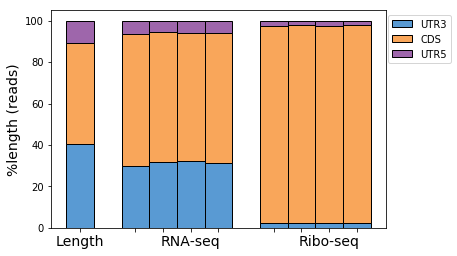

In [10]:
width = 1
groupgap = 1
human_colors = ['#599ad3', '#f9a65a', '#9e66ab']
human_ind = np.arange(1)
rna_ind = np.arange(len(rnas)) + groupgap + 1
ribo_ind = np.arange(len(ribos)) + 2*groupgap + len(rnas) + 1
ind = np.array([0, 2, 3, 4, 5, 7, 8, 9, 10])
fig, ax = plt.subplots()
human_utr3 = ax.bar(human_ind, human_proportions[2], width, color=human_colors[0], edgecolor='black', label="UTR3")
human_cds = ax.bar(human_ind, human_proportions[1], width, color=human_colors[1], edgecolor='black', bottom=human_proportions[2], label="CDS")
human_utr5 = ax.bar(human_ind, human_proportions[0], width, color=human_colors[2], edgecolor='black', bottom=human_proportions[1]+human_proportions[2], label="UTR5")

rna_utr5 = ax.bar(rna_ind, rna_proportions[2], width, color=human_colors[0], edgecolor='black')
rna_cds = ax.bar(rna_ind, rna_proportions[1], width, color=human_colors[1], edgecolor='black', bottom=rna_proportions[2])
rna_utr3 = ax.bar(rna_ind, rna_proportions[0], width, color=human_colors[2], edgecolor='black', bottom=rna_proportions[1]+rna_proportions[2])

ribo_utr5 = ax.bar(ribo_ind, ribo_proportions[2], width, color=human_colors[0], edgecolor='black')
ribo_cds = ax.bar(ribo_ind, ribo_proportions[1], width, color=human_colors[1], edgecolor='black', bottom=ribo_proportions[2])
ribo_utr3 = ax.bar(ribo_ind, ribo_proportions[0], width, color=human_colors[2], edgecolor='black', bottom=ribo_proportions[1]+ribo_proportions[2])

ax.set_ylabel('%length (reads)', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(('Length', '', '', 'RNA-seq', '', '', '', 'Ribo-seq'), fontsize=14)
plt.legend(loc=9, bbox_to_anchor=(1.1, 1.0))
plt.show()

pp = PdfPages('{}/{}_reads_proportions.pdf'.format(outputs, project))
pp.savefig(fig)
pp.close()

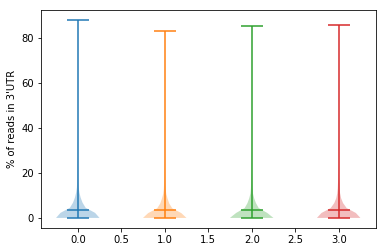

In [12]:
fig = plt.figure(1)
for i, ribo in enumerate(ribo_profiles):
    utr5 = ribo.utr5
    cds = ribo.cds
    utr3 = ribo.utr3
    data = pd.DataFrame({"utr3": utr3['length']*utr3['mean'], "total": (utr5['length']*utr5['mean'] + cds['length']*cds['mean'] + utr3['length']*utr3['mean'])})
    data = data.dropna(how='any')
    data = data[data['total'] > 100]
    data = data['utr3'] / data['total']
    plt.violinplot(np.array(data*100), [i], points=40, showmeans=True, showextrema=True, showmedians=False)
plt.ylabel('% of reads in 3\'UTR')
plt.show()
pp = PdfPages('{}/{}_genewise_reads_proportions.pdf'.format(outputs, project))
pp.savefig(fig)
pp.close()

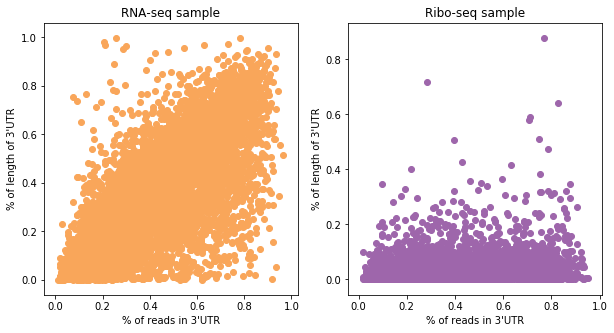

In [13]:
fig = plt.figure(1, figsize=(10, 5))
plt.subplot(121)
utr5 = rna_profiles[0].utr5
cds = rna_profiles[0].cds
utr3 = rna_profiles[0].utr3
data = pd.DataFrame({"utr3": utr3['length']*utr3['mean'], 
                     "total": (utr5['length']*utr5['mean'] + cds['length']*cds['mean'] + utr3['length']*utr3['mean']),
                     "human_utr3": human.utr3.seq.apply(len), 
                     "human_total": human.utr5.seq.apply(len) + human.cds.seq.apply(len) + human.utr3.seq.apply(len)})
data = data.dropna(how='any')
data = data[data['total'] > 100]
data_x = data['human_utr3'] / data['human_total']
data_y = data['utr3'] / data['total']
plt.scatter(np.array(data_x), np.array(data_y), color='#f9a65a')
plt.xlabel('% of reads in 3\'UTR')
plt.ylabel('% of length of 3\'UTR')
plt.title('RNA-seq sample')

plt.subplot(122)
utr5 = ribo_profiles[0].utr5
cds = ribo_profiles[0].cds
utr3 = ribo_profiles[0].utr3
data = pd.DataFrame({"utr3": utr3['length']*utr3['mean'], 
                     "total": (utr5['length']*utr5['mean'] + cds['length']*cds['mean'] + utr3['length']*utr3['mean']),
                     "human_utr3": human.utr3.seq.apply(len), 
                     "human_total": human.utr5.seq.apply(len) + human.cds.seq.apply(len) + human.utr3.seq.apply(len)})
data = data.dropna(how='any')
data = data[data['total'] > 100]
data_x = data['human_utr3'] / data['human_total']
data_y = data['utr3'] / data['total']
plt.scatter(np.array(data_x), np.array(data_y), color='#9e66ab')
plt.xlabel('% of reads in 3\'UTR')
plt.ylabel('% of length of 3\'UTR')
plt.title('Ribo-seq sample')

plt.show()

pp = PdfPages('{}/{}_corr_length_reads.pdf'.format(outputs, project))
pp.savefig(fig)
pp.close()

In [17]:
common_genes = set(human.utr3.index)
for ribo in ribo_profiles:
    ribo_series = pd.Series(ribo.utr3['mean']*ribo.utr3['length'])
    ribo_sorted = ribo_series.sort_values(ascending=False)
    top100 = ribo_sorted[:20].index
    common_genes = common_genes.intersection(set(top100))

In [18]:
len(common_genes)

18

In [51]:
common_genes = ['ENSG00000224916']

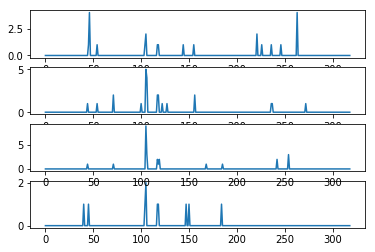

In [53]:
for i, gene in enumerate(common_genes):
    gene_name = gene
    #fig = plt.figure(i+1, figsize=(10, 10))

    for i, ribo in enumerate(ribo_profiles):
        plt.subplot('{}1{}'.format(len(ribo_profiles), i))
        plt.plot(literal_eval(ribo.utr3.loc[gene]['coverage']))
    #plt.suptitle("pileup of ribosome for gene {}".format(gene_name))
    #plt.show()
    #pp = PdfPages('{}/{}_{}_3utr.pdf'.format(outputs, project, gene_name))
    #pp.savefig(fig)
    #pp.close()

In [16]:
ribo_profiles[0].utr3.head()

,offset_5p,offset_3p,length,mean,median,stdev,count
gene_name,,,,,,,
ENSG00000000003,10,0,2920,0.019521,0.0,0.605310,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ENSG00000000419,10,0,268,0.223881,0.0,1.775210,"[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 3.0, 0.0, ..."
ENSG00000000457,10,0,4085,0.013464,0.0,0.161283,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ENSG00000000460,10,0,3718,0.075847,0.0,0.367673,"[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, ..."
ENSG00000001036,10,0,1309,0.032850,0.0,0.631239,"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 6.0, 4.0, ..."
